# Unsupervised Learning

## Generating and Exploring Data

In [ ]:
#generating simple example data with dice rolls

from random import choices,seed

numberofrolls = 1800
seed(9)
dice1 = choices([1,2,3,4,5,6],k=numberofrolls)
dice2 = choices([1,2,3,4,5,6],k=numberofrolls)



In [ ]:
print(dice1[:10])

[3, 3, 1, 6, 1, 4, 6, 1, 4, 4]


In [ ]:
#finding the sum of the two dice

dicesum = [d1+d2 for d1,d2 in zip(dice1,dice2)]

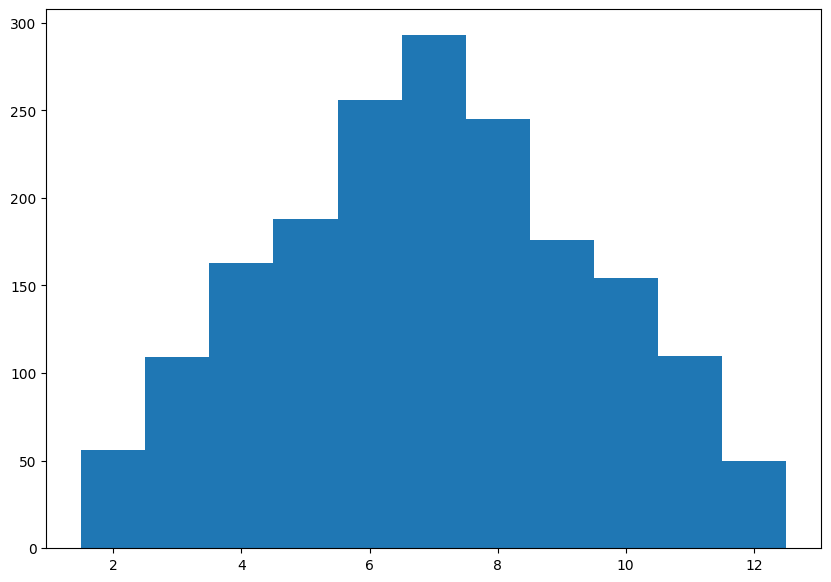

In [ ]:
#plotting a histogram of the dice sum

import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots(figsize =(10,7))
ax.hist(dicesum,bins=[2,3,4,5,6,7,8,9,10,11,12,13],align="left")
plt.show()

In [ ]:
#getting the mean and standard deviation

print(np.mean(dicesum))
print(np.std(dicesum))

6.9511111111111115
2.46753338126444


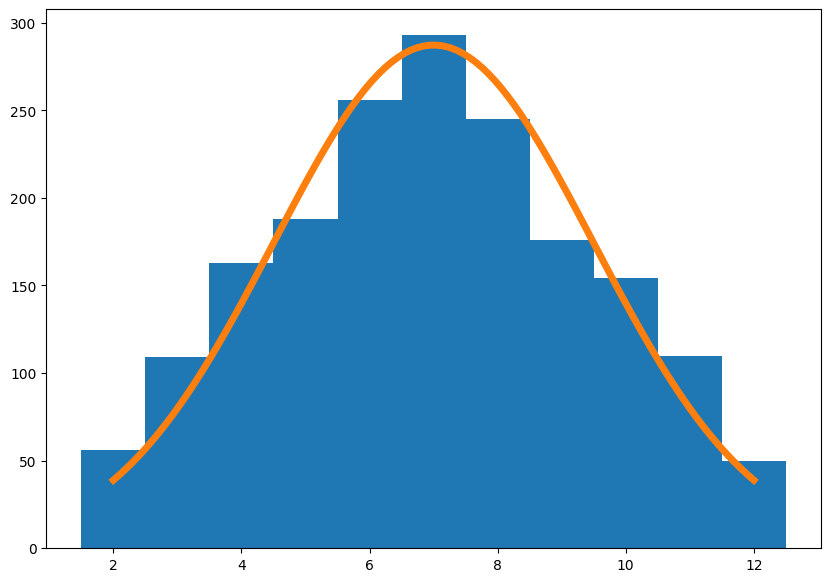

In [ ]:
#plotting a bell curve over our histomgram

fig,ax = plt.subplots(figsize =(10,7))
ax.hist(dicesum,bins=[2,3,4,5,6,7,8,9,10,11,12,13],align="left")
import scipy.stats as stats
import math
mu = 7
sigma = 2.5
x = np.linspace(mu-2*sigma,mu+2*sigma,100)*1
plt.plot(x,stats.norm.pdf(x,mu,sigma) *numberofrolls,linewidth=5 )
plt.show()


## Using Another kind of Die

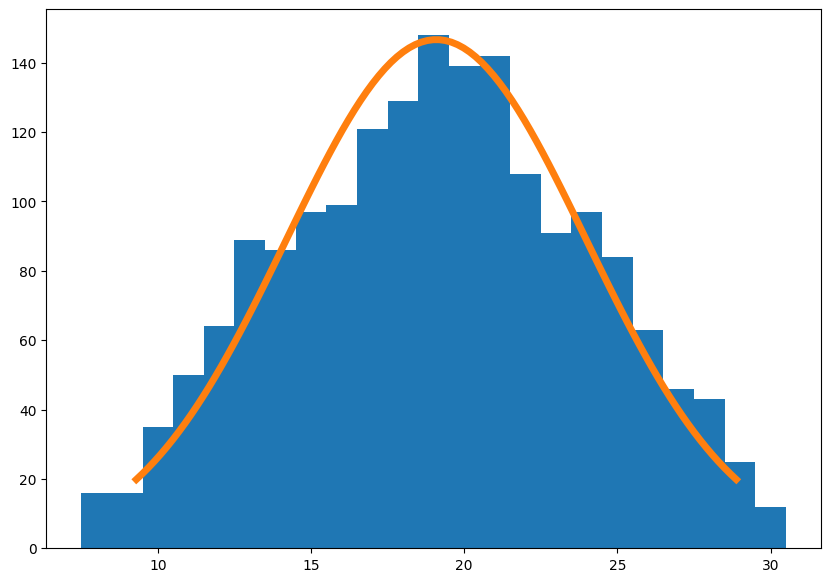

In [ ]:
seed(913)
dice1 = choices([4,5,6,7,8,9,10,11,12,13,14,15],k=numberofrolls)
dice2 = choices([4,5,6,7,8,9,10,11,12,13,14,15],k=numberofrolls)

dicesum12 = [d1+d2 for d1,d2 in zip(dice1,dice2)]

fig,ax = plt.subplots(figsize =(10,7))
ax.hist(dicesum12,bins=range(8,32),align="left")
mu = np.mean(dicesum12)
sigma = np.std(dicesum12)
x = np.linspace(mu-2*sigma,mu+2*sigma,100)*1
plt.plot(x,stats.norm.pdf(x,mu,sigma) *numberofrolls,linewidth=5 )
plt.show()

## The Origin of Observations with Clustering

In [ ]:
dicesumboth = dicesum + dicesum12

seed(494)

randomselection = choices(dicesumboth,k=1)

print(randomselection)



[12]


## E-M Clustering

In [ ]:
#Obtaining the data 2d data that will be used in our clustering example

import ast
import requests

link = "https://bradfordtuckfield.com/emdata.txt"
f = requests.get(link)
allpoints = ast.literal_eval(f.text)

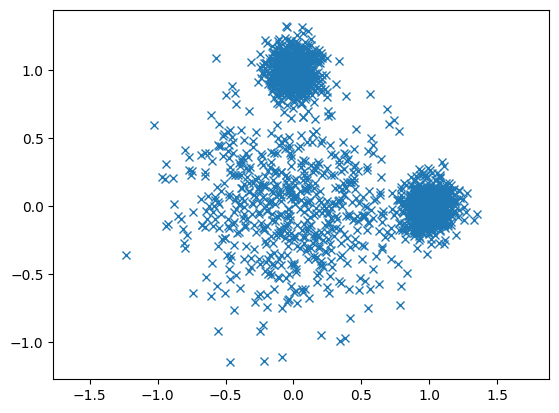

In [ ]:
#plotting the data

allxs = [p[0] for p in allpoints]
allys = [p[1] for p in allpoints]

plt.plot(allxs,allys,"x")
plt.axis("equal")
plt.show()

## The Guessing Step of E-M Clustering

In [ ]:
#inital guesses

mean1 = [-1,0]
mean2 = [0.5,-1]
mean3 = [0.5,0.5]

allmeans = [mean1,mean2,mean3]

cov1 = [[1,0],[0,1]]
cov2 = [[1,0],[0,1]]
cov3 = [[1,0],[0,1]]

allcovs = [cov1,cov2,cov3]

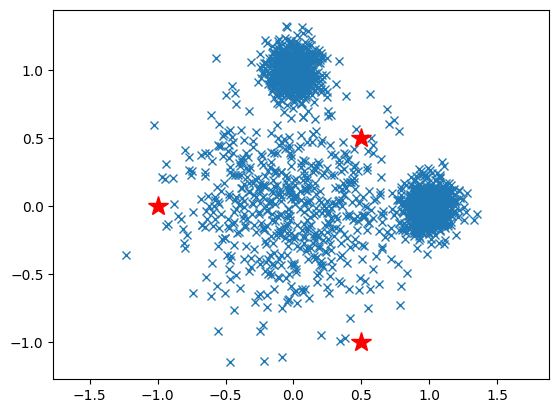

In [ ]:
#plotting the cluster with the guesses

plt.plot(allxs,allys,"x")
plt.plot(mean1[0],mean1[1],"r*",markersize =15)
plt.plot(mean2[0],mean2[1],"r*",markersize =15)
plt.plot(mean3[0],mean3[1],"r*",markersize =15)
plt.axis("equal")
plt.show()

## The expectation Step

In [ ]:
#function to classify all our points
import math
from scipy.stats import multivariate_normal
def classify(allpts,allmns,allvars):
  vars = []
  for n in range(len(allmns)):
    vars.append(multivariate_normal(mean=allmns[n],cov=allvars[n]))
  classification =[]
  for p in allpts:
    this_classification = -1
    this_pdf = 0
    for n in range(len(allmns)):
      pdf = vars[n].pdf(p)
      if pdf > this_pdf:
        this_pdf = pdf
        this_classification = n + 1
    classification.append(this_classification)
  return classification


In [ ]:
theclass = classify(allpoints,allmeans,allcovs)

In [ ]:
print(theclass[:10])

[1, 1, 1, 1, 3, 1, 3, 3, 1, 3]


## Other Clustering Methods

In [ ]:
#implementing k-means clustering

from sklearn.cluster import KMeans

kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(allpoints)
newclass = [label+1 for label in kmeans.labels_]